In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pathlib import Path

# Reading data and preprocessing

In [2]:
def preprocess_image(image):
    

def read_and_plot_images(folder):
    images = []
    plt.figure(figsize=(20,10))
    for i, filename in enumerate(Path(folder).iterdir()):
        img = cv2.imread(str(filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (25, 25))
        images.append(img)
        plt.subplot(5, 10, i+1)
        plt.imshow(img, cmap='gray')
    images = np.stack(images) / 255 # normalization
    images = images[..., np.newaxis]
    plt.show()
    return images

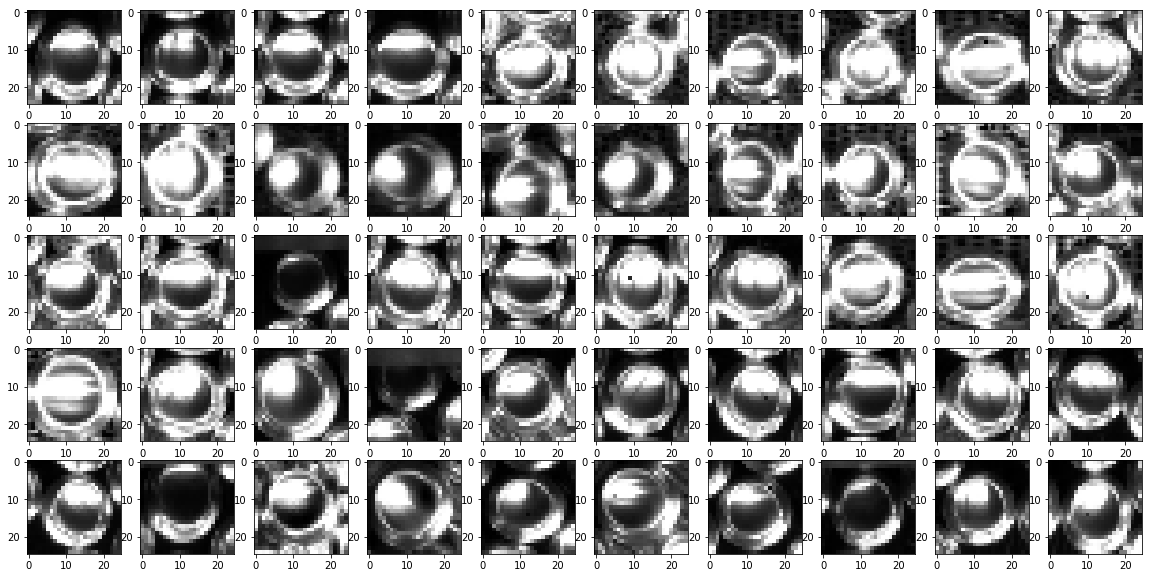

In [3]:
positive_images = read_and_plot_images('positive')

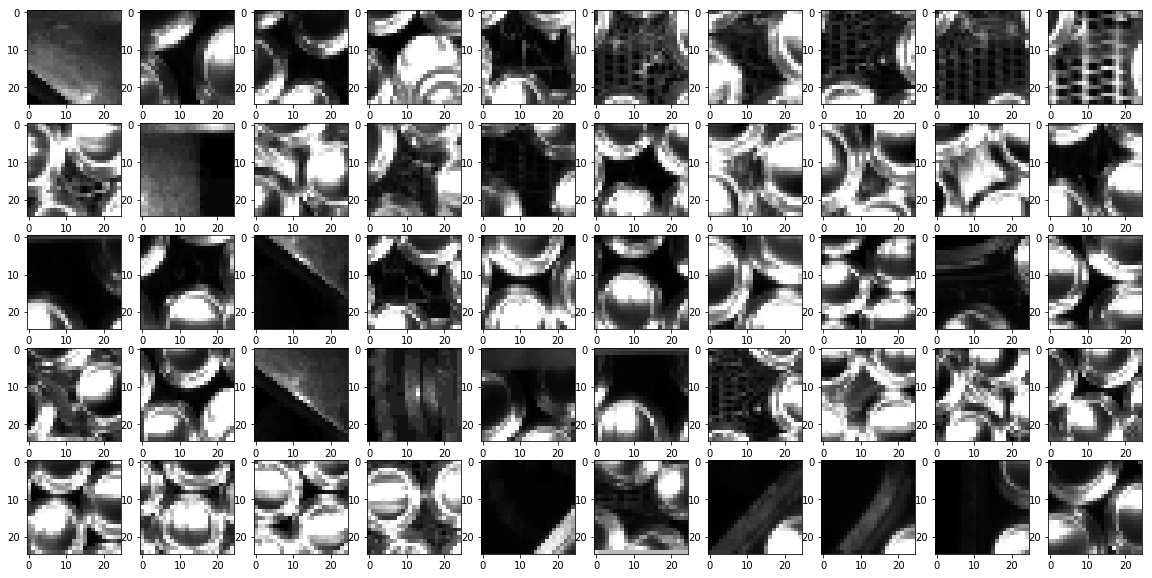

In [4]:
negative_images = read_and_plot_images('negative')

In [5]:
print(positive_images.shape, positive_images.dtype)
print(negative_images.shape, negative_images.dtype)

(50, 25, 25, 1) float64
(50, 25, 25, 1) float64


In [6]:
# join positive and negative together
X = np.concatenate([positive_images, negative_images])
y = np.concatenate([np.ones(positive_images.shape[0]),
                    np.zeros(negative_images.shape[0])])
print(X.shape, y.shape)

(100, 25, 25, 1) (100,)


# Train/Test split

In [7]:
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 25, 25, 1) (10, 25, 25, 1) (90,) (10,)


# Deep learning

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, strides=2, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Conv2D(16, 3, strides=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.input_shape, model.output_shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 16)          2320      
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 15,345
Trainable params: 15,345
Non-trainable params: 0
_________________________________________________________________
(None, 25, 25, 1) (None, 1)


In [9]:
model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Train on 81 samples, validate on 9 samples
Epoch 1/30
81/81 [==============================] - 0s 4ms/step - loss: 0.6968 - acc: 0.4444 - val_loss: 0.6860 - val_acc: 0.7778
Epoch 2/30
81/81 [==============================] - 0s 124us/step - loss: 0.6828 - acc: 0.7901 - val_loss: 0.6778 - val_acc: 0.8889
Epoch 3/30
81/81 [==============================] - 0s 123us/step - loss: 0.6684 - acc: 0.8519 - val_loss: 0.6640 - val_acc: 0.8889
Epoch 4/30
81/81 [==============================] - 0s 123us/step - loss: 0.6506 - acc: 0.8272 - val_loss: 0.6440 - val_acc: 0.8889
Epoch 5/30
81/81 [==============================] - 0s 121us/step - loss: 0.6228 - acc: 0.8395 - val_loss: 0.6147 - val_acc: 0.8889
Epoch 6/30
81/81 [==============================] - 0s 135us/step - loss: 0.5870 - acc: 0.8889 - val_loss: 0.5715 - val_acc: 0.8889
Epoch 7/30
81/81 [==============================] - 0s 123us/step - loss: 0.5419 - acc: 0.9136 - val_loss: 0.5154 - val_acc: 0.8889
Epoch 8/30
81/81 [=================

# Evaluation on test set

In [121]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", acc*100, '%')

10/10 [==============================] - 0s 200us/step
Loss: 0.06858713924884796
Accuracy: 100.0 %
